In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A Problem of minimizing the $l_1$ norm

### Mohsin Javed, June 01, 2019

Given vectors $v, w$ in $\mathbf{R}^n$, find $\alpha \in \mathbf{R}$ such that $\|\alpha v - w \|_1$ is minimized.

Recall that

\begin{align}
\|\alpha v - w \|_1 = \sum_{i=1}^{n}|\alpha v_i - w_i|, \qquad i = 1, 2, \ldots, n.
\end{align}

Let us explore the structure of the problem for $n=4$.

In [127]:
n = 20
v = np.random.randint(-20, 20, n)
w = np.random.randint(-20, 20, n)
#v = np.array([-8, -1, 1, 8])
#w = np.array([ -9,  16, -20, -12])

We now pick a range of $\alpha$ and compute and plot the $l_1$-norm.

In [128]:
alpha = np.arange(-5, 5, .05)
l1_norm = list(map(lambda a: np.linalg.norm(a*v - w, 1), alpha))

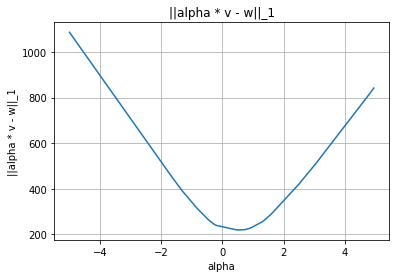

In [129]:
plt.plot(alpha, l1_norm)
plt.grid(True)
plt.title('||alpha * v - w||_1')
plt.xlabel('alpha')
plt.ylabel('||alpha * v - w||_1');

Clearly for large enough $\alpha$, the function is increasing and linear. In fact, the function has the slope $\|v\|_1$ for large positive $\alpha$. This is true because for large positive $\alpha$, the term 
$\alpha v_i - w_i$ has the same sign as the sign of $v_i$. Hence in this case, the net coefficient of $\alpha$ in the smmation $\sum_{i=1}^{n} |\alpha v_i - w_i|$ is $\|v\|_1$. Similarly, for sufficiently negative $\alpha$, the functon is decreasing, linear and has slope $-\|v\|_1$. The slope of the norm changes from $-\|v\|_1$ to $\|v\|_1$, therefore, the function must have a minimum in between. 

The simplest case to solve is when $n=1$. This one dimentional problem is trivial. The function $\|\alpha v - w\|_1$ has a minimum at $\alpha^* = \frac{w}{v}$. For $n=2$, the function $\|\alpha v - w\|_1$ has a minimum contained in the interval formed by the minimum and the maximum of the set $\{w_1/v_1, w_2/v_2\}$. 

The general solution can now be outlined. Find the numbers $a$ and $b$, such that:

\begin{align}
a &= \min \{w_i/v_i: v_i \neq 0, i = 1, 2, \ldots, n\},\\
~ & \\
b &= \max \{w_i/v_i: v_i \neq 0, i = 1, 2, \ldots, n\}.\\
\end{align}

The minimum of the $l_1$-norm lies in the interval $[a, b]$.

In [133]:
roots = [w_i/v_i for (w_i, v_i) in zip(w, v) if v_i != 0]
a = np.min(roots)
b = np.max(roots)
[a, b]

[-1.75, 5.0]

To find the minimum, we argue as follows. The function defining the $l_1$ norm is a sum of absolute value functions, hence continuous and piecewise differentiable. The minimum must lie on one of the _boundary_ points:

\begin{align}
\alpha^* = argmin \{\|\alpha v - w\|_1\big{|}_{\alpha = w_i/v_i}: i = 1, 2, \ldots, n \}
\end{align}

In [134]:
critical_points = sorted(roots)
critical_points

[-1.75,
 -1.3333333333333333,
 -0.8181818181818182,
 -0.5,
 -0.4166666666666667,
 -0.25,
 -0.21052631578947367,
 0.47058823529411764,
 0.7333333333333333,
 0.8,
 0.9285714285714286,
 1.3076923076923077,
 1.3636363636363635,
 1.6,
 1.6666666666666667,
 2.5,
 3.0,
 4.75,
 5.0]

In [135]:
norm_values = list(map(lambda a: np.linalg.norm(a*v - w, 1), critical_points))
norm_values

[469.5,
 393.66666666666663,
 312.2727272727273,
 269.0,
 258.6666666666667,
 242.0,
 239.31578947368422,
 218.88235294117646,
 219.93333333333334,
 222.19999999999996,
 227.85714285714283,
 255.15384615384616,
 260.6363636363636,
 289.00000000000006,
 298.3333333333333,
 420.0,
 501.0,
 805.5,
 851.0]

In [136]:
alpha_star = critical_points[np.argmin(norm_values)]
f_min = norm_values[np.argmin(norm_values)]
(alpha_star, f_min)

(0.47058823529411764, 218.88235294117646)

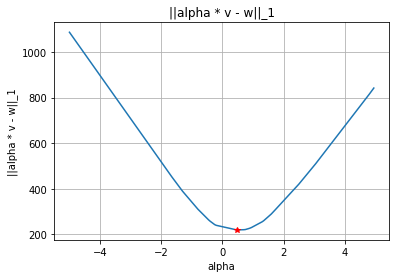

In [137]:
plt.plot(alpha, l1_norm)
plt.plot(alpha_star, f_min, 'r*')
plt.grid(True)
plt.title('||alpha * v - w||_1')
plt.xlabel('alpha')
plt.ylabel('||alpha * v - w||_1');
plt.plot();